In [8]:
%pylab inline
import sklearn
import pandas as pd
import mylib.utils as mu
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
data = mu.load_data(['personal'])

In [4]:
target = mu.load_target_data()

In [9]:
results = mu.train_regression(data, ravel(target), scorer=f1_score)

17:28:36 10/02/15 BRT - Spliting into test and validation
17:28:36 10/02/15 BRT - Starting to train models
17:28:36 10/02/15 BRT - Took 0.425990104675 seconds


/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
mu.print_best(results)

------------------------------------------------- 
0 Model - Score: val - 0.534884 :: train - 0.638655
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
------------------------------------------------- 
------------------------------------------------- 
1 Model - Score: val - 0.505051 :: train - 0.709821
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
------------------------------------------------- 
------------------------------------------------- 
2 Model - Score: val - 0.489796 :: train - 0.893246
RandomForestClassifier(bo

AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_importances_'

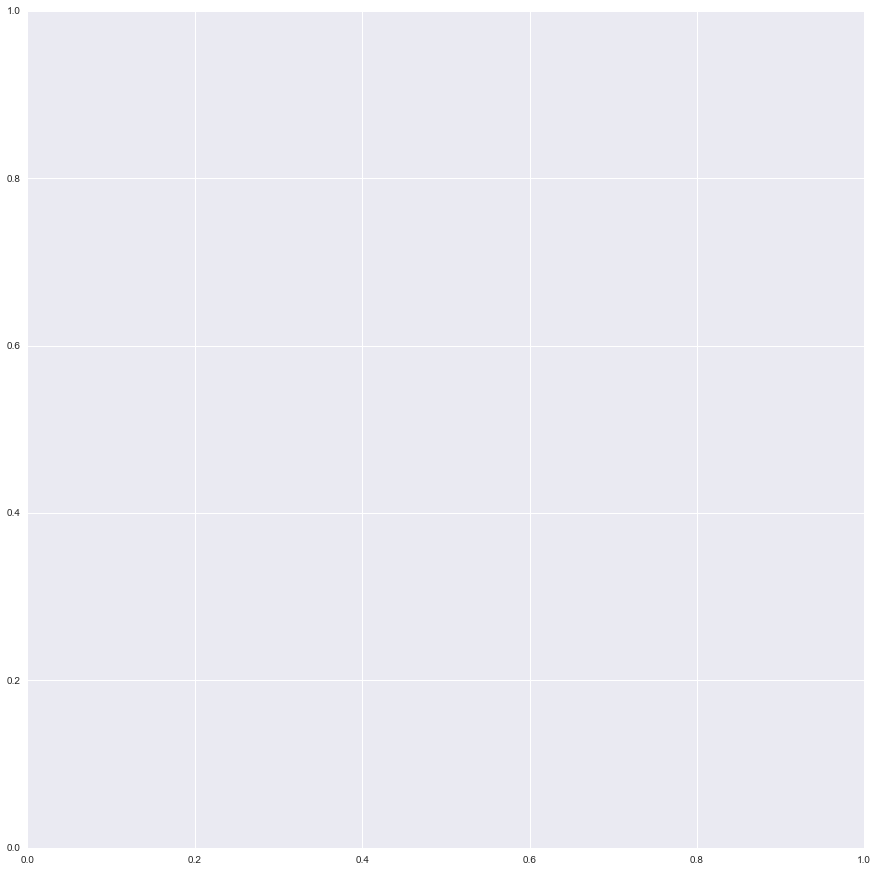

In [7]:
import seaborn as sns
model = results[0][1]['model']
# print model info
f, ax = plt.subplots(figsize=(15, 15))
index_most_important = model.feature_importances_>0.03
ax = sns.barplot(x=data.columns[index_most_important], y=model.feature_importances_[index_most_important])